### Name : Juilee Talele | Roll no : D19012 | Stats Assignment

## Sampling Distribution

#### Introduction :
- Sampling distribution is a graph of statistics of a data
- We can any statistic ex: mean, standard deviation, range etc.
- The number of observations in a population, the number of observations in a sample and the procedure used to draw the sample   sets determine the variability of a sampling distribution. The standard deviation of a sampling distribution is called the     standard error
- We draw multiple sample and draw sample mean for every sample

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

### For this exercise use Attrition data ( Interest variable - MonthlyIncome )

In [2]:
df = pd.read_csv("attrition.csv")   # Importing attrition data lets call it as df i.e dataframe

In [3]:
df.head()   # To check the Column names and values of df 

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2


#### Question 1:
Plot the distribution of variable monthly income, this will the population distribution of the variable

In [4]:
x = df['MonthlyIncome']   # we just consider monthly income variable as population 

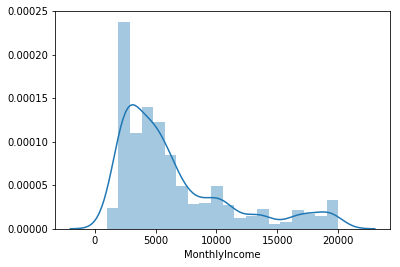

In [5]:
sns.distplot(x)    # plot the graph of population

#### Question 2 :
Draw a sample of size 200, plot the sample distribution of variable and comment on whether it represent the population distribution.

#### Taking the sample of 200 from the population

In [6]:
np.random.seed()
sample = np.random.choice(df.MonthlyIncome,200, replace = False)   # taking a random sample from population

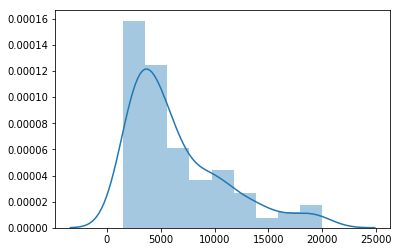

In [7]:
sns.distplot(sample)    # plot of sample set

#### Plot of population and sample 

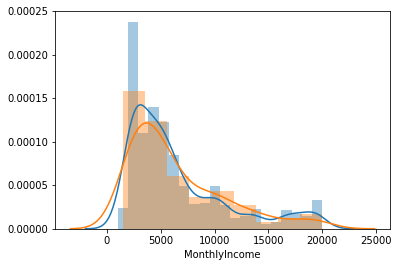

In [8]:
sns.distplot(x)   # x represents the main population 
sns.distplot(sample)

#### *Comment* : As seen from the graph we can say the sample represents the population

#### Question 3 :
Draw a random sample of size 200 with replacement from the sample collected in question 2. Plot the histogram and comment whether it represents S & P.

#### Taking random sample ( d_sample ) with replacement.Therefore we kept replce = True and it will/might contain repeated/duplicate values

In [9]:
d_sample = np.random.choice(sample,200,replace=True)   # taking d-sample from sample set. Note: replace = True

#### Plot of d_sample

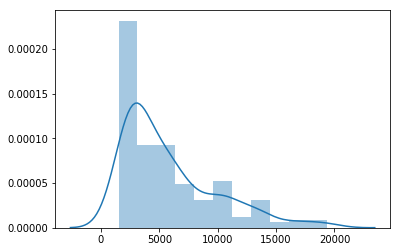

In [10]:
sns.distplot(d_sample)  # Plot of d-sample

#### Comparing graph of Population (x), Sample and d_sample

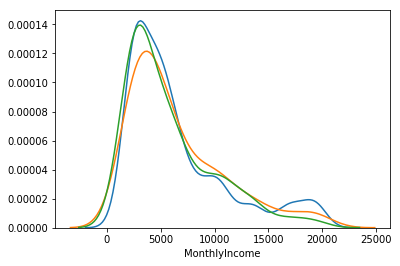

In [11]:
sns.distplot(x,hist=False)
sns.distplot(sample,hist=False)
sns.distplot(d_sample,hist=False)

#### *Comment* : As seen from the plot above, we can say that the d_sample (with replacement) does represents population set (x) and sample (s)
#### Since S represents P and D represents , we can say D represents P 

#### Question 4 :
 Repeat step 3 from 10 times and note the observation.

#### On repeating step 3 for 10 times we can say we are using the Bootstarpping 

In [12]:
mean_arr = []
for i in range(0,10):
    d = np.random.choice(sample,200,replace=True)
    mean = np.mean(d)
    mean_arr.append(mean)

In [13]:
Bootstrap = np.mean(mean_arr)
Bootstrap

6455.348

In [14]:
np.mean(d_sample)

5826.185

In [15]:
np.std(mean_arr)

294.34249598214654

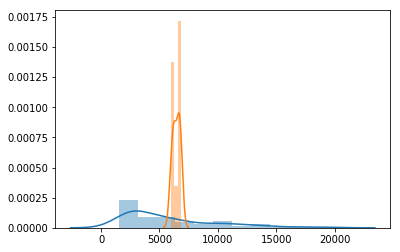

In [16]:
sns.distplot(d_sample)
sns.distplot(mean_arr)

#### Question 5 :
Check if CLT holds using the variable monthly income

#### Observe that while doing CLT we are keeping the replace = False and taking the random sample from population unlike in bootstrapping we take d_sample from the sample set that too keeping replace = True

In [17]:
mean_arr = []
for i in range(0,100000):      # We can the change the no of iterations
    d = np.random.choice(x,200,replace=False)
    mean = np.mean(d)
    mean_arr.append(mean)

In [18]:
clt = np.mean(mean_arr)
clt

6502.661980549999

In [19]:
np.std(mean_arr)

310.5952768621775

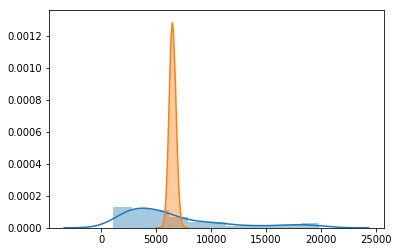

In [20]:
d = np.random.choice(x,200,replace=False)
sns.distplot(d)
sns.distplot(mean_arr)

#### Question 6 : 
Calculate the Bootstrap estimate of the standard error of average monthly income using sample S. Check whether it agrees with the result of CLT.

In [21]:
Difference = Bootstrap - clt
print('Bootstrap mean : ')
print(Bootstrap)
print('clt mean : ')
print(clt)
print('Difference mean : ')
np.abs(Difference)

Bootstrap mean : 
6455.348
clt mean : 
6502.661980549999
Difference mean : 


47.31398054999863

### *CONCLUSION* : As we can see the difference between Bootstrapping and CLT is just 47.31.
### Hence we can Bootstrapping almost agrees with the result of central limit theorem .